Dimensions : (3000000, 32)
Colonnes du dataset :
['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY         

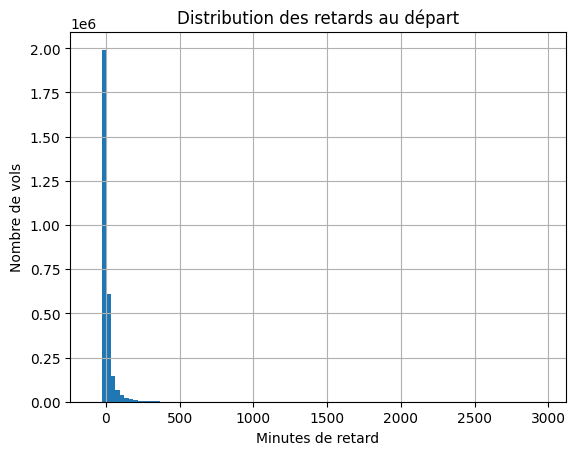

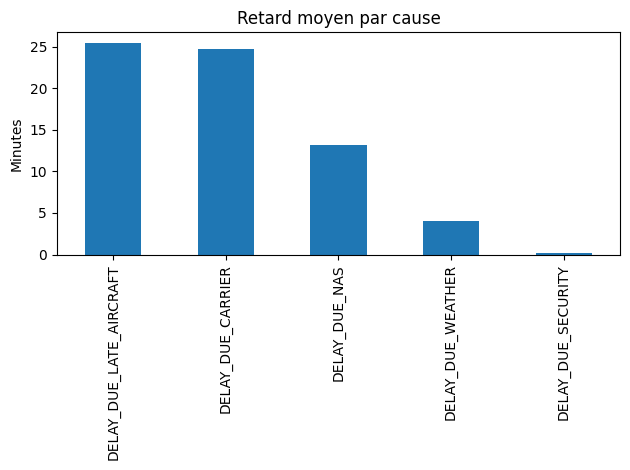

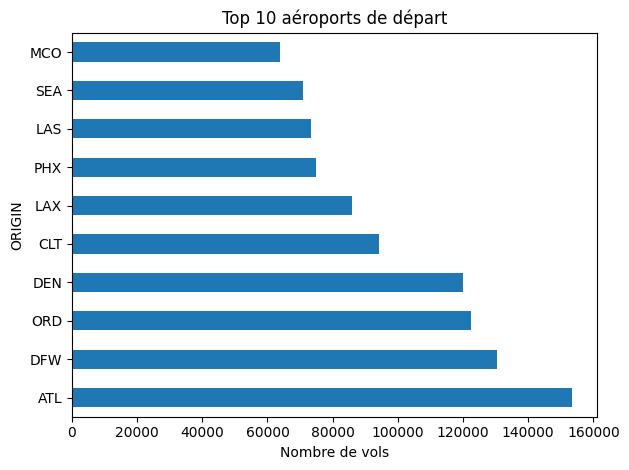

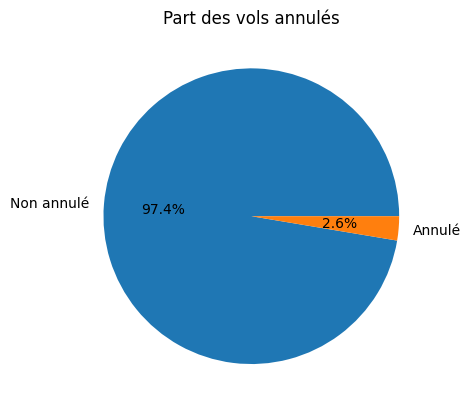

In [14]:
# 01_exploration.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage large
pd.set_option('display.max_columns', None)

# Charger le dataset
df = pd.read_csv("../data/flights_sample_3m.csv")

# Aperçu
print("Dimensions :", df.shape)
# df.head(10)

# Liste des colonnes
print("Colonnes du dataset :")
print(df.columns.tolist())

# Infos générales
df.info()

# Statistiques descriptives
df.describe()

### 📊 Analyse des retards au départ

df['DEP_DELAY'].hist(bins=100)
plt.title("Distribution des retards au départ")
plt.xlabel("Minutes de retard")
plt.ylabel("Nombre de vols")
plt.grid(True)
plt.show()

### 🔍 Retards moyens par cause
delay_cols = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

df[delay_cols].mean().sort_values(ascending=False).plot(kind='bar', title="Retard moyen par cause")
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()
### 🛫 Top 10 aéroports de départ

df['ORIGIN'].value_counts().head(10).plot(kind='barh', title="Top 10 aéroports de départ")
plt.xlabel("Nombre de vols")
plt.tight_layout()
plt.show()

### ❌ Analyse des vols annulés
df['CANCELLED'].value_counts(normalize=True).plot(kind='pie', labels=['Non annulé', 'Annulé'], autopct='%1.1f%%')
plt.title("Part des vols annulés")
plt.ylabel("")
plt.show()

# df['ORIGIN'].value_counts().head(10)
# df['DEST'].value_counts().head(10)
# df['DEP_DELAY'].value_counts().head(10)
# df['DISTANCE'].value_counts().head(10)
# df['DELAY_DUE_CARRIER'].value_counts().head(10)
# df['DELAY_DUE_WEATHER'].value_counts().head(10)
# df['DELAY_DUE_NAS'].value_counts().head(10)
# df['DELAY_DUE_SECURITY'].value_counts().head(10)
# df['DELAY_DUE_LATE_AIRCRAFT'].value_counts().head(10)

## 